In [14]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

from logging_utilities import log_init, log_params, log_finish, create_iter_kwargs, save_data
from repeater_algorithm import RepeaterChainSimulation, plot_algorithm


INFO:root:ID: tau_opt-20200826-204510
INFO:root:Date: 2020-08-26 20:45:10



average waiting time 4901.588920569591
average w_func 0.703380413140992
Deterministic elapse time
 5.199094533920288

coverage 0.9999999557865852


NameError: name 'secret_key_rate' is not defined

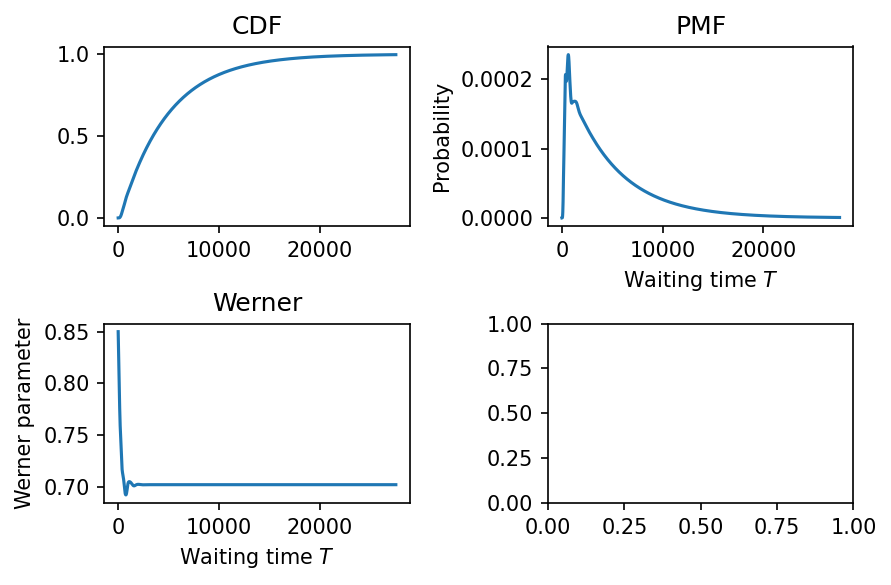

In [15]:
if __name__ == "__main__":
    # set parameters
    parameters = {
        "protocol": (0, 0, 0),
        "p_gen": 0.01,
        "p_swap": 0.5,
        # "cutoff": (175, 319, 553),
        "cutoff": (176, 320, 554),
        "w0": 0.98,
        "t_coh": 4000,
        "t_trunc": 80000,
        }


    ID = log_init("tau_opt", level=logging.INFO)
    fig, axs = plt.subplots(2, 2, dpi=150)
    kwarg_list = create_iter_kwargs(parameters)

    # # simulation part
    # t_sample_list = []
    # w_sample_list = []

    # for kwarg in kwarg_list:
    #     start = time.time()
    #     print("Sample parameters:")
    #     print(kwarg)
    #     t_samples_level, w_samples_level = repeater_mc(kwarg)
    #     t_sample_list.append(t_samples_level)
    #     w_sample_list.append(w_samples_level)
    #     end = time.time()
    #     print("MC Simulation elapse time\n", end-start)
    #     print()
    # save_data(id, data=[t_sample_list, w_sample_list])

    # plot_mc_simulation(
    #     [t_sample_list, w_sample_list], axs, t_trunc=None,
    #     parameters=parameters, bin_width=1)

    # exact
    for kwarg in kwarg_list:
        # n = 10
        # kwarg = deepcopy(kwarg)
        # tau = np.asarray(kwarg["tau"])
        # kwarg["tau"] = tuple(tau * n)
        # kwarg["p_gen"] = 1 - (1-kwarg["p_gen"])**(1/n)
        # kwarg["t_coh"] = kwarg["t_coh"] * n
        # kwarg["t_trunc"] = kwarg["t_trunc"] * n
        # print(kwarg)
        start = time.time()
        simulator = RepeaterChainSimulation()
        pmf, w_func = simulator.nested_protocol(parameters=kwarg)
        end = time.time()
        print("average waiting time", np.sum(pmf * np.arange(len(pmf))))
        print("average w_func", np.sum(pmf * w_func))
        t = 0
        while(pmf[t] < 1.0e-17):
            w_func[t] = np.nan
            t += 1
        print("Deterministic elapse time\n", end-start)
        print()
        plot_algorithm(pmf, w_func, axs, t_trunc=None)
        print("coverage", sum(pmf))
        print("secret without extrap", secret_key_rate(pmf, w_func, False))
        # print("secret with extrap", secret_key_rate(pmf, w_func, True))
        print()

    # plot setup
    legend = None
    axs[0][0].set_title("CDF")
    axs[0][1].set_title("PMF")
    axs[1][0].set_title("Werner")
    if legend is not None:
        for i in range(2):
            for j in range(2):
                axs[i][j].legend(legend)
    plt.tight_layout()
    plt.show()
    input()